In [11]:
import random

import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import numpyro.distributions as npdist
from gpflow.kernels import Matern12, Matern52
import jax.config as config

config.update("jax_enable_x64", True)

In [14]:
ls = [.1, .2, .4, .6, .8, 1.]

x = jnp.linspace(0, 1, 80).reshape((-1, 1))

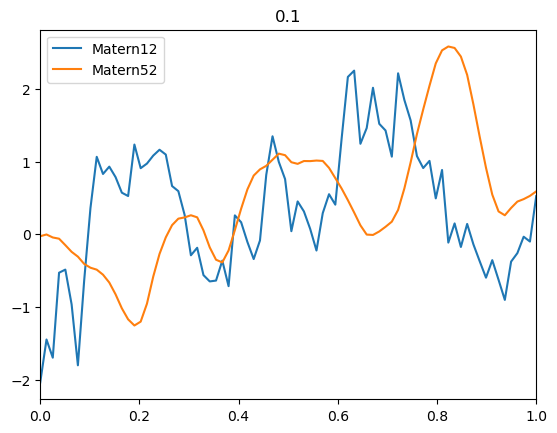

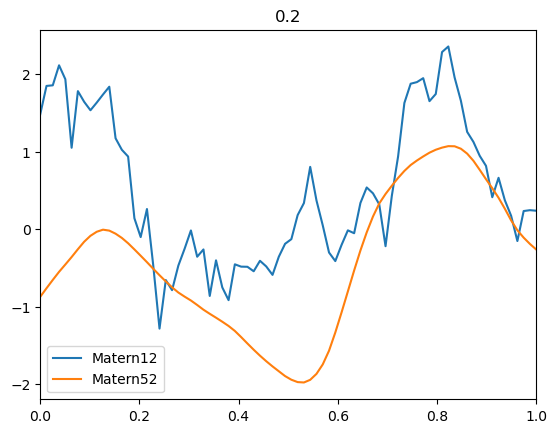

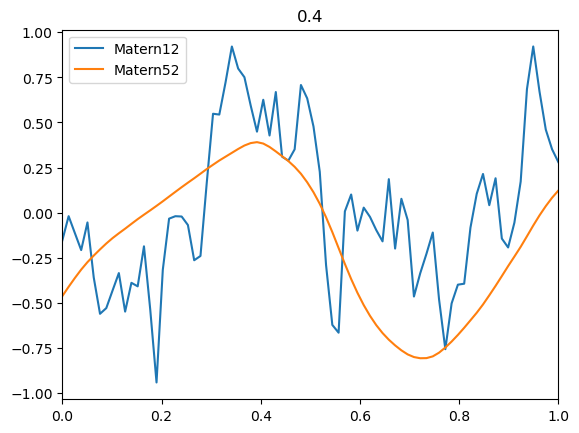

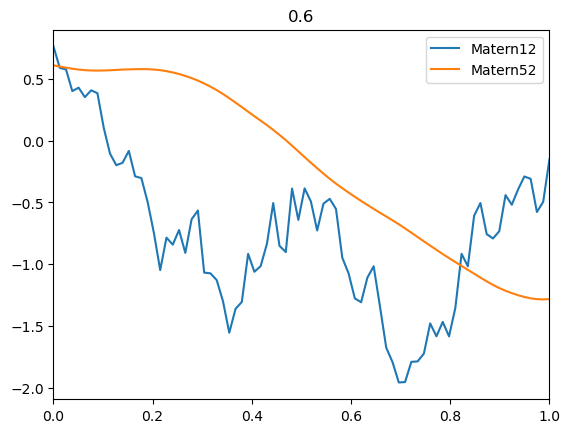

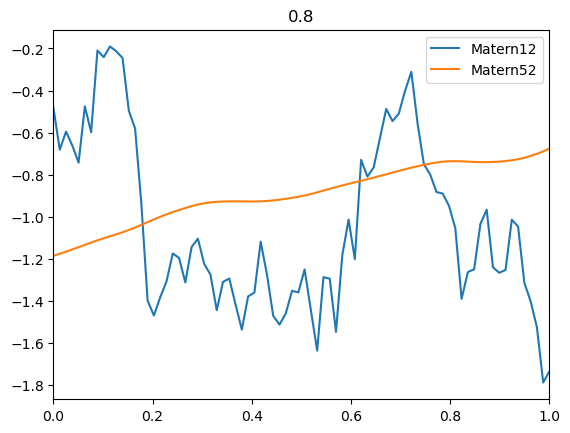

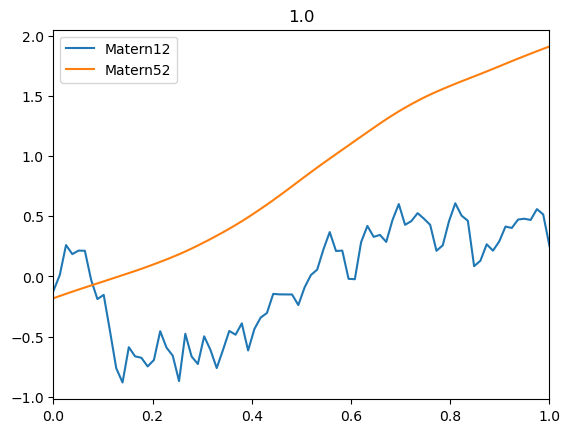

In [15]:
for l in ls:
    matern12 = Matern12(lengthscales=l)
    matern52 = Matern52(lengthscales=l)
    
    matern12_cov = matern12(x).numpy()
    matern52_cov = matern52(x).numpy()
    
    key = jax.random.PRNGKey(random.randint(0, 9999))
    key1, key2 = jax.random.split(key, 2)
    
    matern12_samps = npdist.MultivariateNormal(loc=jnp.zeros(x.shape[0]), 
                                               covariance_matrix=matern12_cov).sample(key1)
    matern52_samps = npdist.MultivariateNormal(loc=jnp.zeros(x.shape[0]), 
                                               covariance_matrix=matern52_cov).sample(key2)
    plt.clf()
    plt.plot(x, matern12_samps, label="Matern12")
    plt.plot(x, matern52_samps, label="Matern52")
    
    plt.xlim([x[0], x[-1]])
    plt.title(l)
    plt.legend()
    plt.show()